# Data from 166 countries

Importing some basics libraries to plot and work with our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Calling our data

In [2]:
data = pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### **Data description**

- **country:** Name of the country.
- **child_mort:** Death of children under 5 years of age per 1000 live births.
- **exports:** Exports of goods and services per capita. Given as %age of the GDP per capita.
- **health:** Total health spending per capita. Given as %age of GDP per capita.
- **imports:** Imports of goods and services per capita. Given as %age of the GDP per capita.
- **income:** Net income per person.
- **inflation:** The measurement of the annual growth rate of the Total GDP.
- **life_expec:** The average number of years a new born child would live if the current mortality patterns are to remain the same.
- **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp:** The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**What you will learn:**
- Data Visualization techniques.
- Feature Engineering & PCA.
- K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.

Let's separate Numerical and Categorical features

In [4]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]   #creates a list called numerical_features and assigns it 
# the remaining column names from the col list. The * operator is used to unpack the elements 
# in the col list into the numerical_features list. 

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


C:\Users\u0161169\AppData\Local\Temp\ipykernel_35964\3350296944.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]],color = colors[0])
C:\Users\u0161169\AppData\Local\Temp\ipykernel_35964\3350296944.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_fe

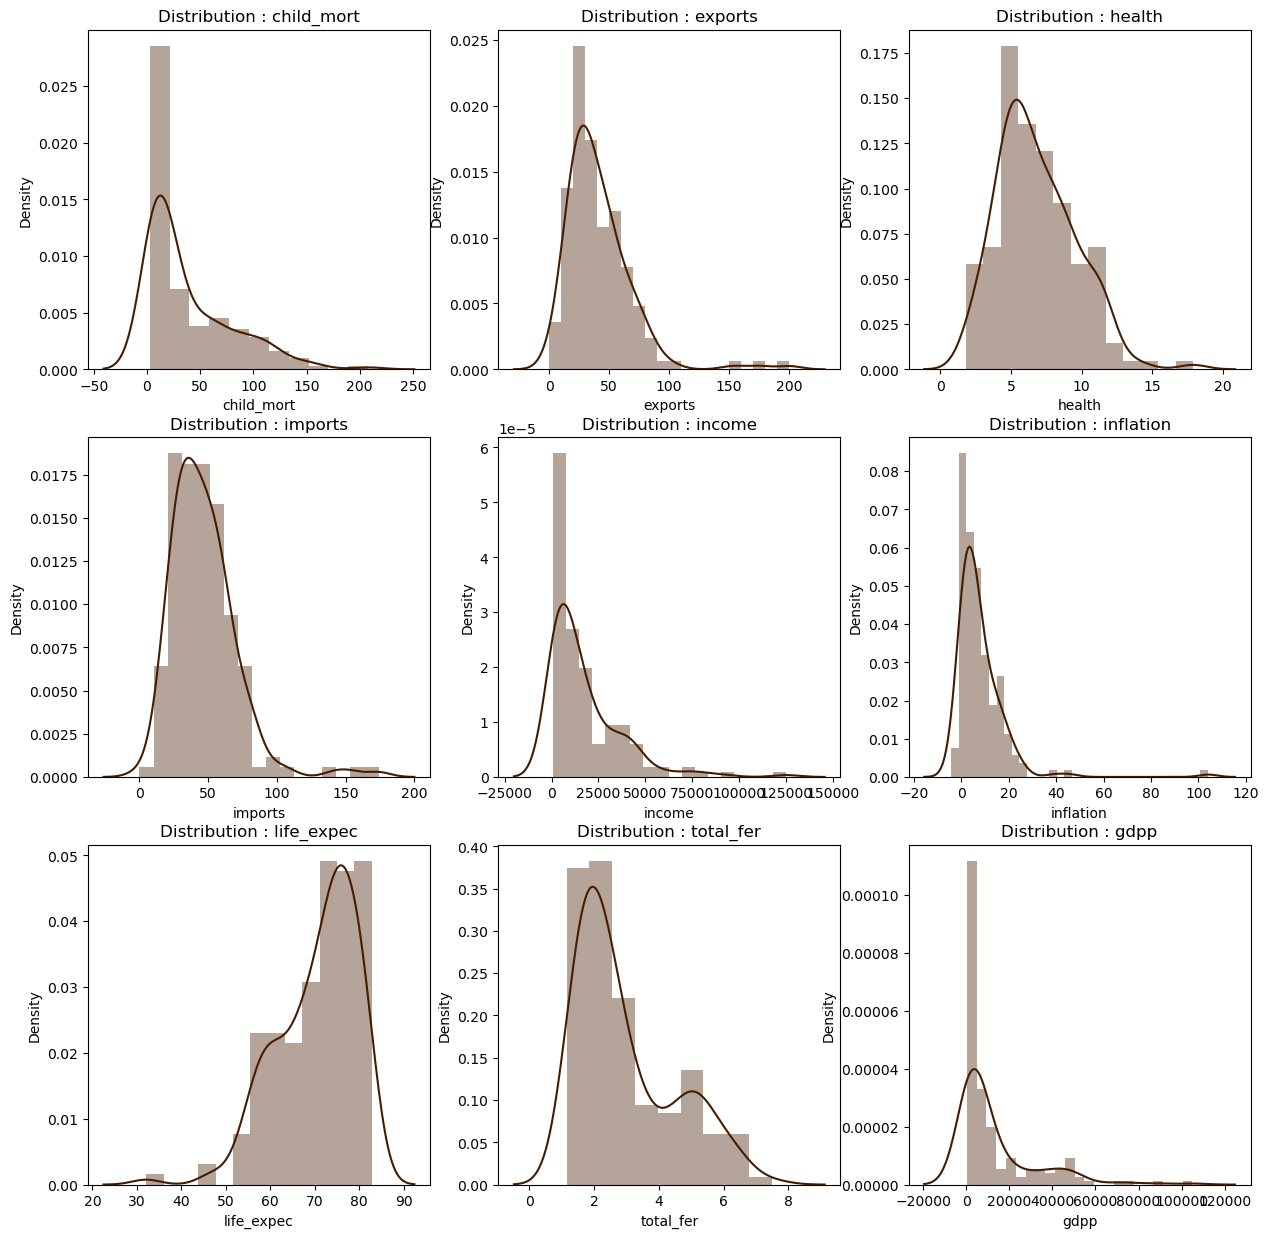

In [11]:
# Let's plot all the features and your distribution to get some insights from the dataset

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
colors = ['#461c00','#ffbf95']
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

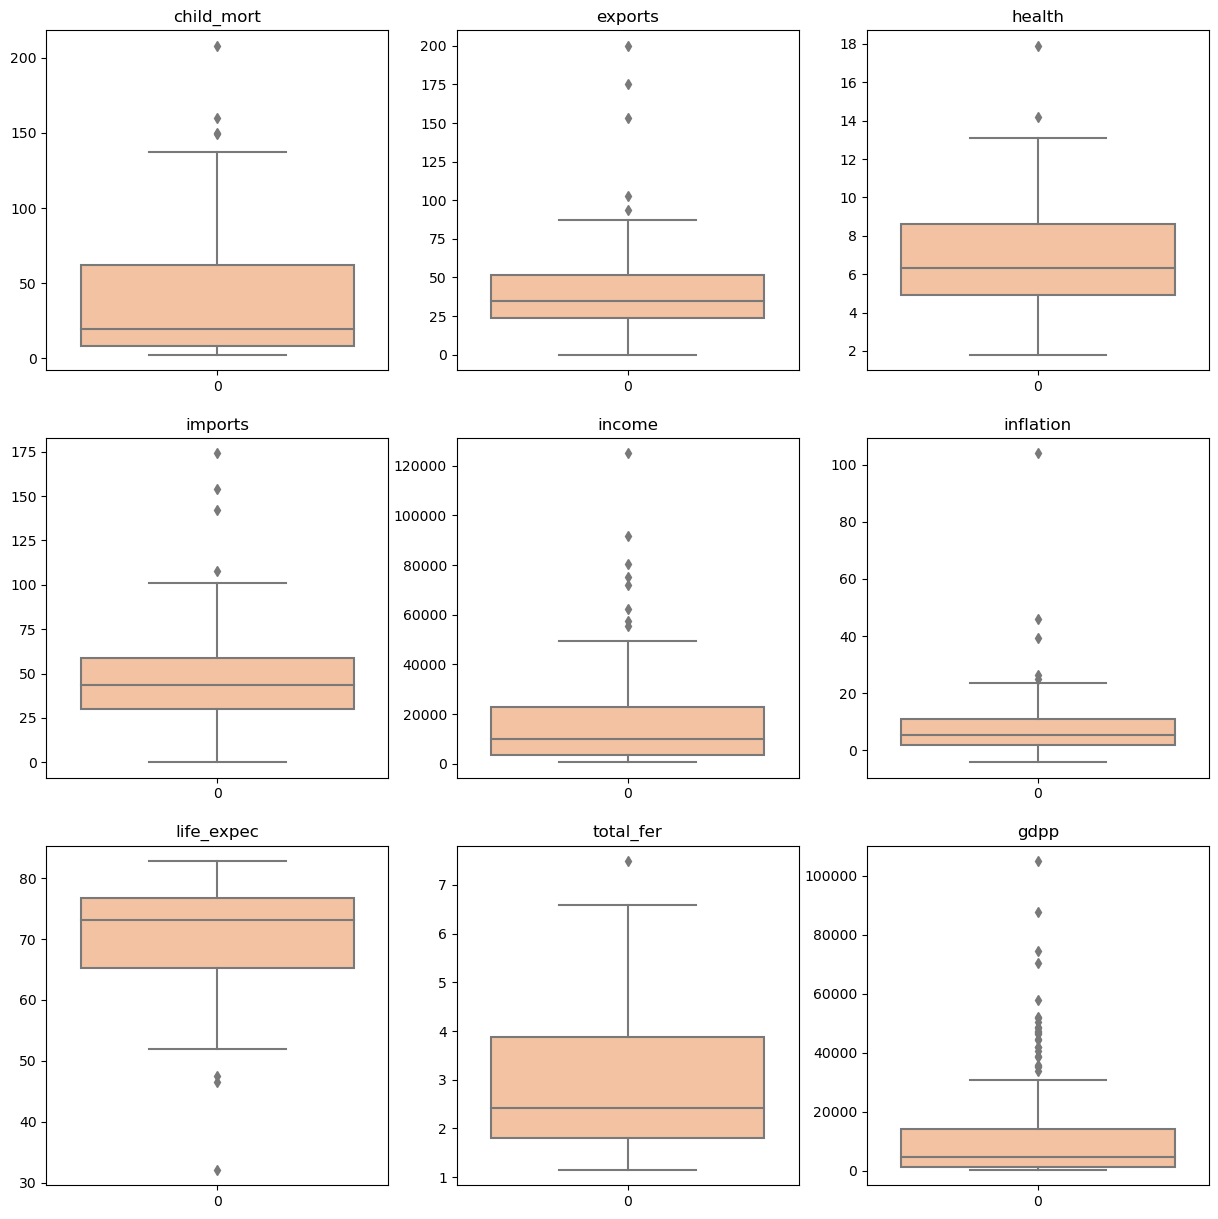

In [17]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[1])
    plt.title(numerical_features[i])
plt.show()

- What you understand from these plots? Can you get some insights from it? \
(Your answer here: )

Now, let's look the features per country

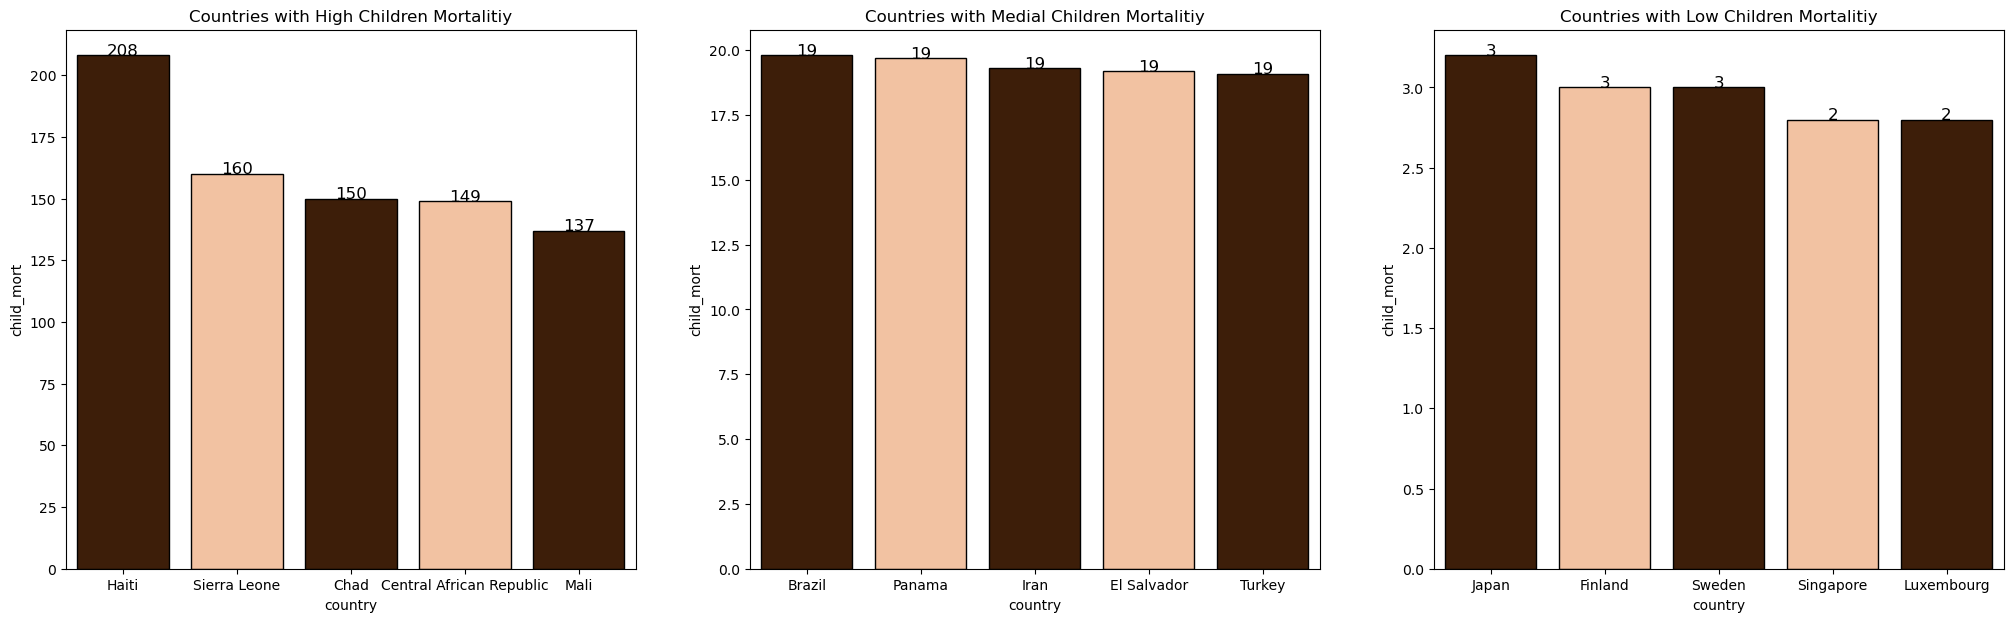

In [12]:
#Here is a code example for you

# Add what is needed (y, by and the title)

#High
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black')
plt.title('Countries with High Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

#Medium
plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black')
plt.title('Countries with Medial Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

#Low
plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black')
plt.title('Countries with High Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

**Exercise:**

- Plot the others features and answer the questions:

- Looking to each feature and the respective values per country, can you make some assumptions between features? Can you see some corelation?

C:\Users\u0161169\AppData\Local\Temp\ipykernel_35964\1060627640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ut = np.triu(data.corr())
C:\Users\u0161169\AppData\Local\Temp\ipykernel_35964\1060627640.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lt = np.tril(data.corr())
C:\Users\u0161169\AppData\Local\Temp\ipykernel_35964\1060627640.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
C:\U

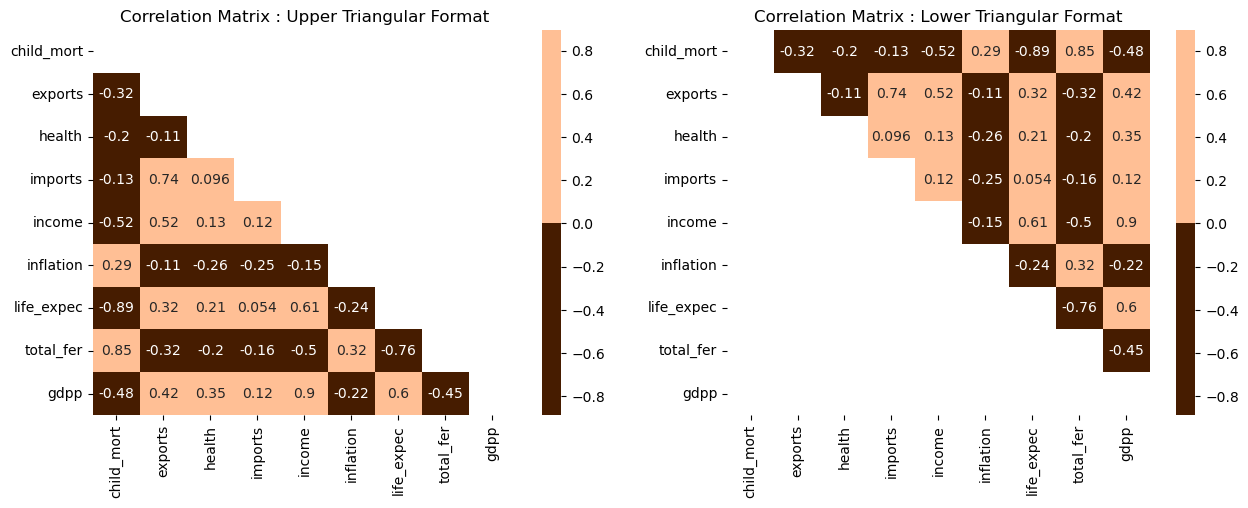

In [16]:
ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

- What we could do with this data?\
(Write your answer here: )



- If we needed to reduce this dataset to just 3 features. How would you perform that? (Just using the knowledge and insights that you got from the graphs) \
(Write your answer here: )

In [14]:
compressed_data = pd.DataFrame()
compressed_data['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
compressed_data['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
compressed_data['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
compressed_data.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [ ]:
# Save your compressed_data to use in the next notebook
compressed_data.to_csv('compressed_countries_data.csv')